In [9]:
import pandas as pd

df= pd.DataFrame()

data =[{'a':1 ,'b':2} , {'a':3 ,'b':4}]
df=pd.DataFrame(data)
df

,a,b
0,1,2
1,3,4


In [10]:
df[['d' ,'e']] = [7,8] ,[9,10]
df

,a,b,d,e
0,1,2,7,8
1,3,4,9,10


In [3]:
import cudf

df= cudf.DataFrame()

data =[{'a':1 ,'b':2} , {'a':3 ,'b':4}]
df=cudf.DataFrame(data)
df

,a,b
0,1,2
1,3,4


In [6]:
df['c'] =[5,6]

df[['d' ,'e']] = [7,8] ,[9,10]

df

,a,b,c,d,e
0,1,2,5,"[7, 8]","[7, 8]"
1,3,4,6,"[9, 10]","[9, 10]"


In [7]:
df =df.drop(['d' ,'e'] ,axis=1)
df

,a,b,c
0,1,2,5
1,3,4,6


In [8]:
import numpy as np

new_cols =np.array([[7,8] ,[9,10]])
df[['d' ,'e']]=new_cols
df

,a,b,c,d,e
0,1,2,5,7,8
1,3,4,6,9,10


In [12]:
import pandas as pd
#import cudf as pd
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

random_state = 42

df = pd.read_csv('./data/train.csv')

df.head()

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,0,1,1,1,9238,1,1,126.0,1,1,...,0,6,7,6,12.428571,0,11.1,0.6,2.02,Graduate
1,1,1,17,1,9238,1,1,125.0,1,19,...,0,6,9,0,0.000000,0,11.1,0.6,2.02,Dropout
2,2,1,17,2,9254,1,1,137.0,1,3,...,0,6,0,0,0.000000,0,16.2,0.3,-0.92,Dropout
3,3,1,1,3,9500,1,1,131.0,1,19,...,0,8,11,7,12.820000,0,11.1,0.6,2.02,Enrolled
4,4,1,1,2,9500,1,1,132.0,1,19,...,0,7,12,6,12.933333,0,7.6,2.6,0.32,Graduate


In [14]:
df.shape

(76518, 38)

In [15]:
df.tail(10)

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
76508,76508,1,1,1,9238,1,1,132.0,1,1,...,0,6,8,5,11.400000,0,11.1,0.6,2.02,Graduate
76509,76509,1,1,1,9500,1,1,147.0,1,37,...,0,7,7,6,14.966667,0,7.6,2.6,0.32,Graduate
76510,76510,1,1,1,9773,1,1,130.0,1,12,...,0,6,6,6,14.666667,0,13.9,-0.3,0.79,Graduate
76511,76511,1,17,1,9773,1,1,138.0,1,1,...,0,6,6,6,13.000000,0,12.4,0.5,1.79,Graduate
76512,76512,1,1,1,9238,1,1,134.0,1,19,...,0,6,6,6,12.166667,0,7.6,2.6,0.32,Graduate
76513,76513,1,17,1,9254,1,1,121.0,1,19,...,0,6,8,5,10.600000,0,13.9,-0.3,0.79,Graduate
76514,76514,1,1,6,9254,1,1,125.0,1,1,...,0,6,9,6,13.875000,0,9.4,-0.8,-3.12,Graduate
76515,76515,5,17,1,9085,1,1,138.0,1,37,...,0,5,8,5,11.400000,1,9.4,-0.8,-3.12,Enrolled
76516,76516,1,1,3,9070,1,1,136.0,1,38,...,0,6,0,0,0.000000,0,7.6,2.6,0.32,Dropout
76517,76517,1,1,1,9773,1,1,133.1,1,19,...,0,6,6,6,13.666667,0,15.5,2.8,-4.06,Graduate


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76518 entries, 0 to 76517
Data columns (total 38 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   id                                              76518 non-null  int64  
 1   Marital status                                  76518 non-null  int64  
 2   Application mode                                76518 non-null  int64  
 3   Application order                               76518 non-null  int64  
 4   Course                                          76518 non-null  int64  
 5   Daytime/evening attendance                      76518 non-null  int64  
 6   Previous qualification                          76518 non-null  int64  
 7   Previous qualification (grade)                  76518 non-null  float64
 8   Nacionality                                     76518 non-null  int64  
 9   Mother's qualification                 

In [17]:
df.describe()

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,...,76518.00000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000
mean,38258.500000,1.111934,16.054419,1.644410,9001.286377,0.915314,3.658760,132.378766,1.226600,19.837633,...,0.05796,0.137053,5.933414,7.234468,4.007201,9.626085,0.062443,11.520340,1.228218,-0.080921
std,22088.988286,0.441669,16.682337,1.229645,1803.438531,0.278416,8.623774,10.995328,3.392183,15.399456,...,0.40849,0.933830,1.627182,3.503040,2.772956,5.546035,0.462107,2.653375,1.398816,2.251382
min,0.000000,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,19129.250000,1.000000,1.000000,1.000000,9119.000000,1.000000,1.000000,125.000000,1.000000,1.000000,...,0.00000,0.000000,5.000000,6.000000,1.000000,10.000000,0.000000,9.400000,0.300000,-1.700000
50%,38258.500000,1.000000,17.000000,1.000000,9254.000000,1.000000,1.000000,133.100000,1.000000,19.000000,...,0.00000,0.000000,6.000000,7.000000,5.000000,12.142857,0.000000,11.100000,1.400000,0.320000
75%,57387.750000,1.000000,39.000000,2.000000,9670.000000,1.000000,1.000000,140.000000,1.000000,37.000000,...,0.00000,0.000000,6.000000,9.000000,6.000000,13.244048,0.000000,12.700000,2.600000,1.790000
max,76517.000000,6.000000,53.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,...,12.00000,19.000000,23.000000,33.000000,20.000000,18.000000,12.000000,16.200000,3.700000,3.510000


In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,76518.0,38258.500000,22088.988286,0.00,19129.250000,38258.500000,57387.750000,76517.000
Marital status,76518.0,1.111934,0.441669,1.00,1.000000,1.000000,1.000000,6.000
Application mode,76518.0,16.054419,16.682337,1.00,1.000000,17.000000,39.000000,53.000
Application order,76518.0,1.644410,1.229645,0.00,1.000000,1.000000,2.000000,9.000
Course,76518.0,9001.286377,1803.438531,33.00,9119.000000,9254.000000,9670.000000,9991.000
Daytime/evening attendance,76518.0,0.915314,0.278416,0.00,1.000000,1.000000,1.000000,1.000
Previous qualification,76518.0,3.658760,8.623774,1.00,1.000000,1.000000,1.000000,43.000
Previous qualification (grade),76518.0,132.378766,10.995328,95.00,125.000000,133.100000,140.000000,190.000
Nacionality,76518.0,1.226600,3.392183,1.00,1.000000,1.000000,1.000000,109.000
Mother's qualification,76518.0,19.837633,15.399456,1.00,1.000000,19.000000,37.000000,44.000


In [21]:
df.groupby('Target')['Target'].count()
# df.groupby('Target')['Target'].count().to_pandas()

Target
Dropout     25296
Enrolled    14940
Graduate    36282
Name: Target, dtype: int64

In [22]:
feature_list = [feature for feature in df.columns if not feature =='Target']
binary_features =['Scholarship holder' ,'International','Gender','Tuition fees up to date','Daytime/evening attendance',
                  'Debtor','Educational special needs','Displaced']

target = "Target"

continuous_features =list(set(feature_list) -set(binary_features))

%time assert feature_list.sort() == (continuous_features + binary_features).sort()

CPU times: user 6 μs, sys: 2 μs, total: 8 μs
Wall time: 13.1 μs


In [25]:
y_sampled = df.Target
#y_sampled = df.Target.to_pandas()
mutual_df = df[feature_list]
#mutual_df = df[feature_list].to_pandas()

mutual_info =mutual_info_classif(mutual_df ,y_sampled ,random_state=random_state)
mutual_info =pd.Series(mutual_info)
mutual_info.index =mutual_df.columns
%time mutual_info =pd.DataFrame(mutual_info.sort_values(ascending =False) ,columns=["Numerical_Feature_MI"])
#%time mutual_info = pd.DataFrame(mutual_info.sort_values(ascending=False), columns = ["Numerical_Feature_MI"] ).to_pandas()
mutual_info.style.background_gradient("cool")


CPU times: user 565 μs, sys: 0 ns, total: 565 μs
Wall time: 1.86 ms


,Numerical_Feature_MI
Curricular units 2nd sem (approved),0.479958
Curricular units 2nd sem (grade),0.412953
Curricular units 1st sem (approved),0.407331
Curricular units 1st sem (grade),0.364241
Curricular units 2nd sem (evaluations),0.196701
Curricular units 1st sem (evaluations),0.187044
Course,0.116724
Tuition fees up to date,0.111499
Admission grade,0.104768
Age at enrollment,0.099375


CPU times: user 36.1 s, sys: 286 ms, total: 36.4 s
Wall time: 22.8 s


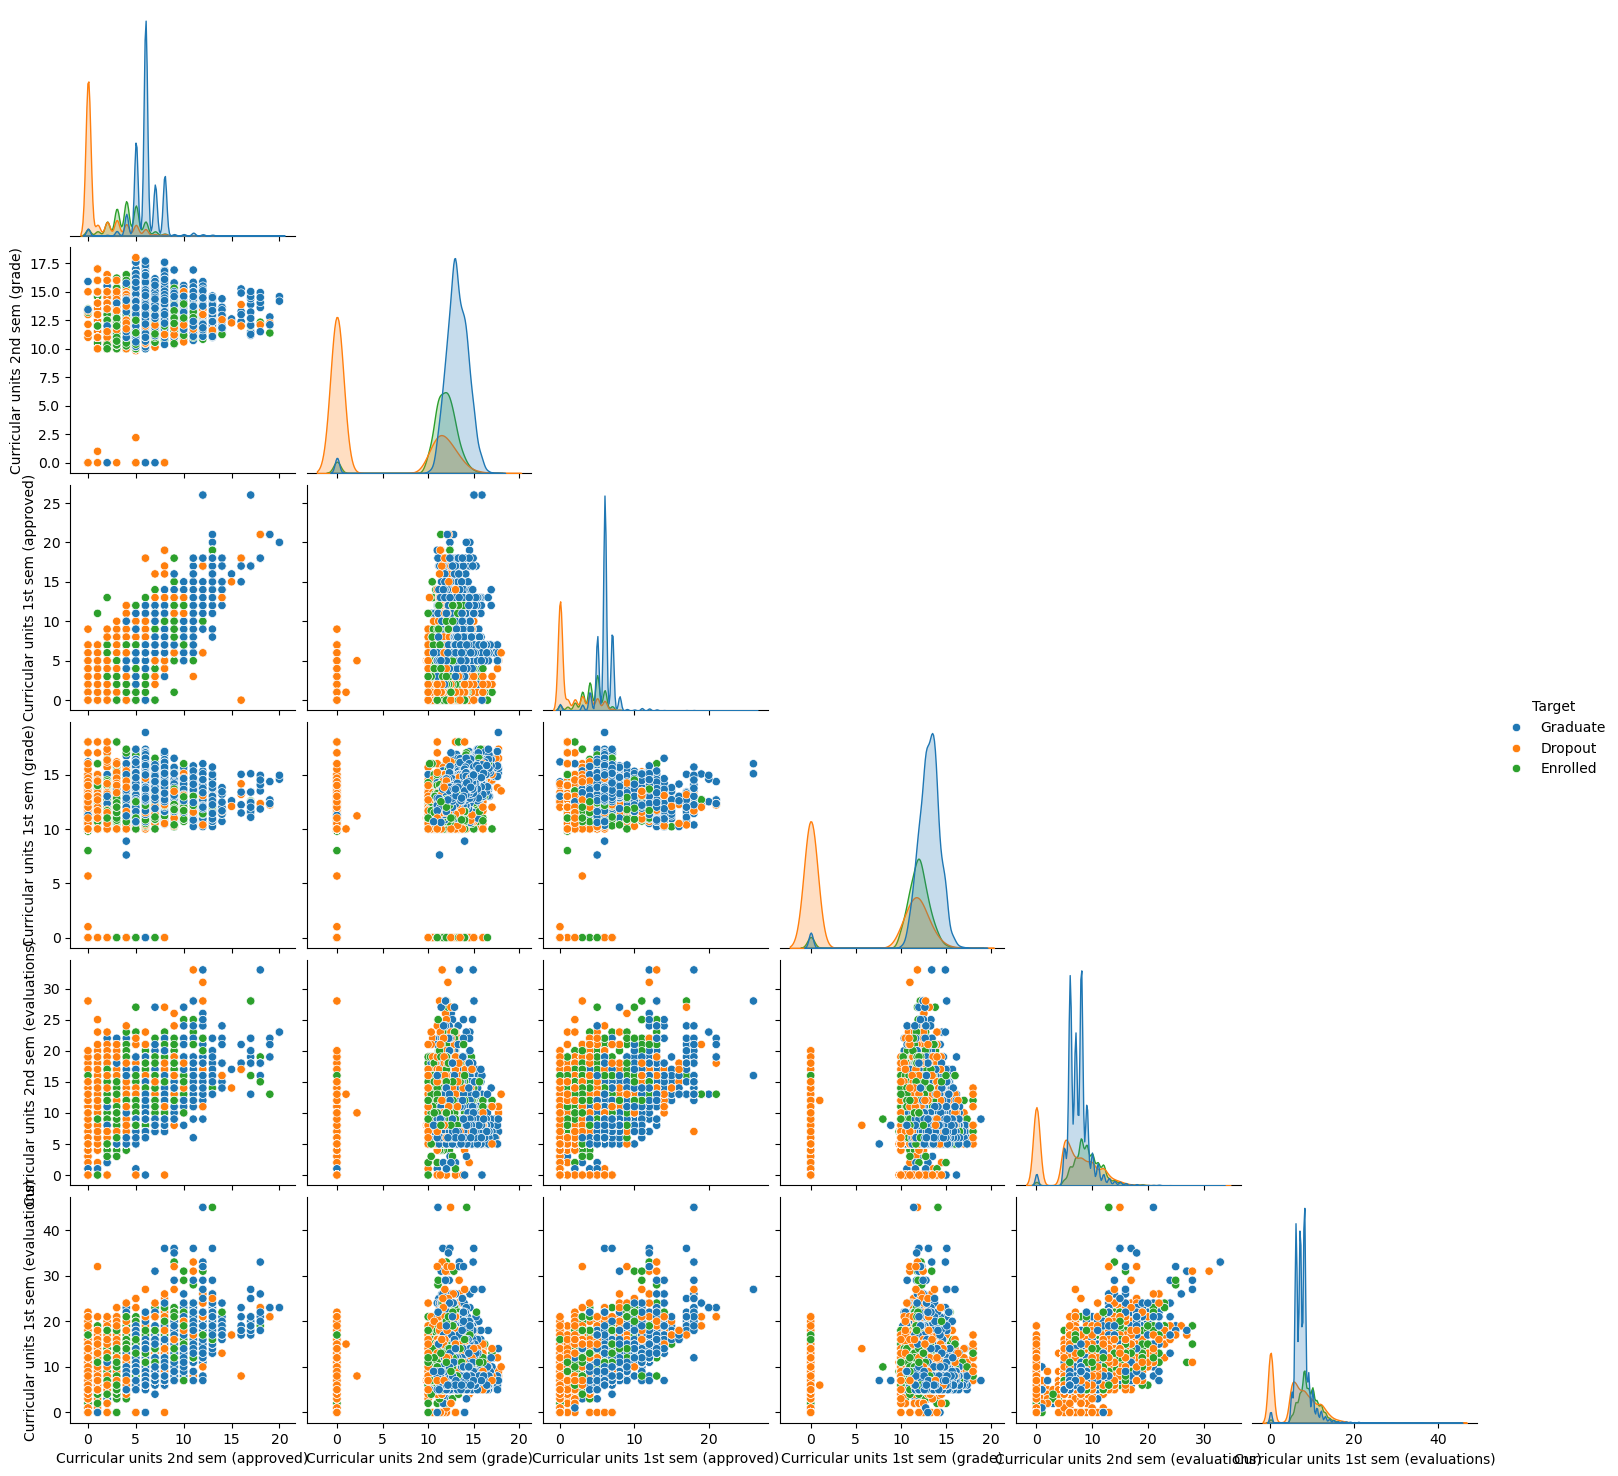

In [26]:
most_important_features =mutual_info[mutual_info["Numerical_Feature_MI"] >0.15].index.tolist()

%time sns.pairplot(df[most_important_features + ['Target']] ,hue='Target', corner=True)
#%time sns.pairplot(df[most_important_features + ['Target']].to_pandas(), hue='Target', corner=True)

plt.show()

# Optionally convert results back to cuDF if further processing is required
gdf = cudf.from_pandas(df)